In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('datasetdl').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float','OUTPUT':'float'})
df.head()

,INPUT,OUTPUT
0,1.0,4.0
1,2.0,7.0
2,3.0,10.0
3,4.0,13.0
4,5.0,16.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:

X = df[['INPUT']].values
y = df[['OUTPUT']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 20)

In [ ]:

Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)


In [ ]:
model=tf.keras.Sequential()

In [ ]:
model.add(Dense(16,activation='relu',input_shape=(1,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mae')

In [ ]:

model.fit(X_train1,y_train,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 11ms/step - loss: 80.1770
Epoch 2/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.1612
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.1453
Epoch 4/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.1289
Epoch 5/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.1107
Epoch 6/1000
2/2 [==============================] - 0s 7ms/step - loss: 80.0919
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.0734
Epoch 8/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.0548
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.0367
Epoch 10/1000
2/2 [==============================] - 0s 7ms/step - loss: 80.0190
Epoch 11/1000
2/2 [==============================] - 0s 6ms/step - loss: 80.0015
Epoch 12/1000
2/2 [==============================] - 0s 7ms/step - loss: 79.9841
Epoch 13/1000
2/2 [=================

<Axes: >

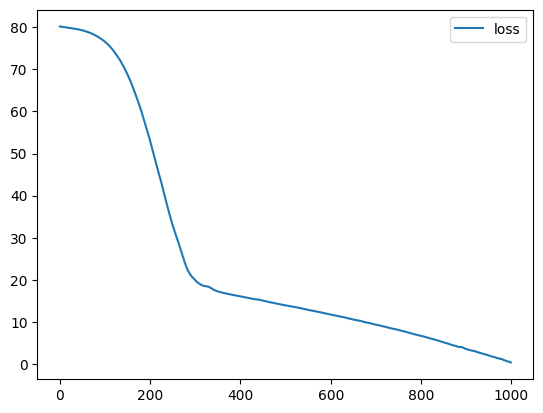

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


In [ ]:
X_test1 = Scaler.transform(X_test)
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 179ms/step - loss: 0.7249


0.724934995174408

In [ ]:
X_n1 = [[25.0]]


X_n1_1 = Scaler.transform(X_n1)


model.predict(X_n1_1)

1/1 [==============================] - 0s 158ms/step


array([[76.14471]], dtype=float32)